In [10]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
credit = pd.read_csv('C:/Users/Sumuk/Desktop/Big Data Certificate/Project V - Python/default of credit card clients.csv', header =1, index_col="ID")

In [27]:
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,0,0,0,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,0,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,0,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [28]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null category
EDUCATION    30000 non-null category
MARRIAGE     30000 non-null category
AGE          30000 non-null int64
PAY_1        30000 non-null category
PAY_2        30000 non-null category
PAY_3        30000 non-null category
PAY_4        30000 non-null category
PAY_5        30000 non-null category
PAY_6        30000 non-null category
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
def_pay      30000 non-null category
dtypes: category(10), int64(14)
memory usage:

In [29]:
credit.describe()

#There are 30000 distinct credit card clients.

#The average value for the amount of credit card limit is 167,484. 

#Education Level is mostly graduate school and university.

#Most of the clients are either married or single.

#Average age is 35.5 years, with a standard deviation of 9.2.

#As the value 0 for default payment means 'not default' and value 1 means 'default', 
#the mean of 0.221 means that there are 22.1% of credit card contracts that will default next month.

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [30]:
credit.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')

In [31]:
credit.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
def_pay      0
dtype: int64

In [32]:
credit = credit.rename(columns={'default payment next month': 'def_pay', 
                        'PAY_0': 'PAY_1'})
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,0,0,0,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,0,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,0,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Text(0.5, 1.0, 'Def_Pay v/s COUNT - Not Default = 0, Default = 1')

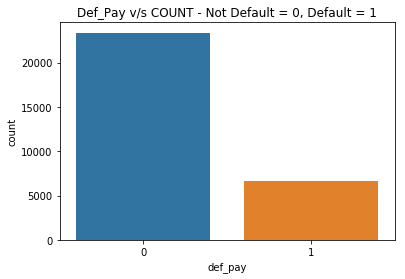

In [33]:
sns.countplot(x='def_pay', data=credit)
plt.title('Def_Pay v/s COUNT - Not Default = 0, Default = 1')

Text(0.5, 1.0, 'SEX v/s COUNT - Male = 1, Female = 2')

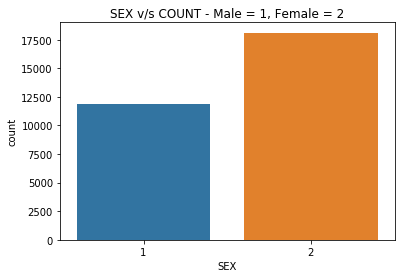

In [34]:
sns.countplot(x='SEX', data=credit)
plt.title('SEX v/s COUNT - Male = 1, Female = 2')

Text(0.5, 1.0, 'EDUCATION v/s COUNT')

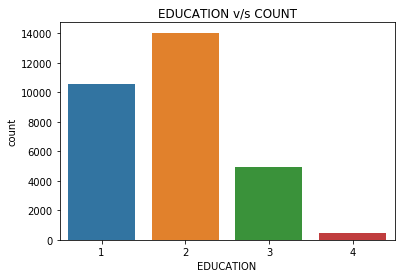

In [35]:
sns.countplot(x='EDUCATION', data=credit)
plt.title('EDUCATION v/s COUNT')

Text(0.5, 1.0, 'MARRIAGE v/s COUNT')

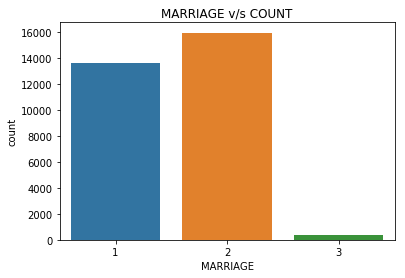

In [36]:
sns.countplot(x='MARRIAGE', data=credit)
plt.title('MARRIAGE v/s COUNT')

Text(0.5, 1.0, 'SEX v/s DEF_PAY COUNT')

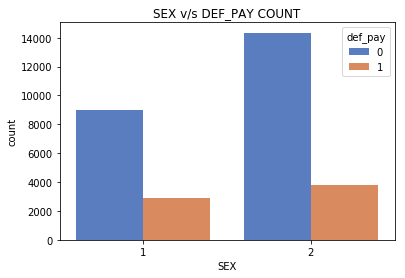

In [37]:
sns.countplot(x='SEX', data=credit, hue="def_pay", palette="muted")
plt.title('SEX v/s DEF_PAY COUNT')

Text(0.5, 1.0, 'MARRIAGE v/s DEF_PAY COUNT')

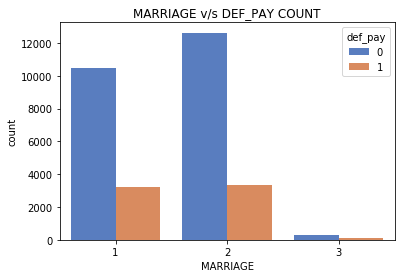

In [38]:
sns.countplot(x="MARRIAGE", data=credit, hue="def_pay", palette="muted")
plt.title('MARRIAGE v/s DEF_PAY COUNT')

Text(0.5, 1.0, 'EDUCATION v/s DEF_PAY COUNT')

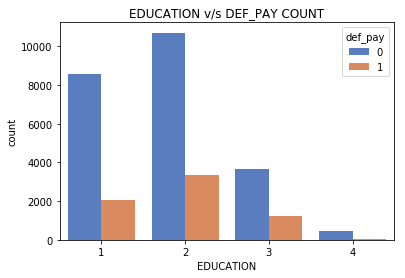

In [39]:
sns.countplot(x="EDUCATION", data=credit, hue="def_pay", palette="muted")
plt.title('EDUCATION v/s DEF_PAY COUNT')

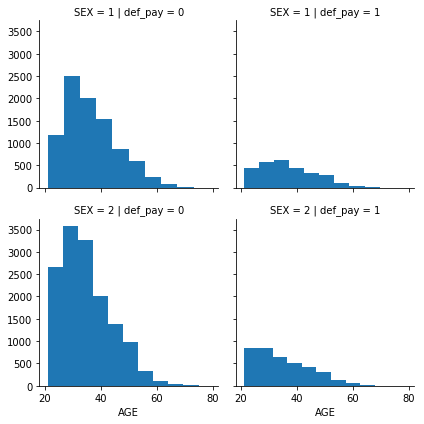

In [45]:
g = sns.FacetGrid(credit, col = 'def_pay', row = 'SEX')
g.map(plt.hist, 'AGE')

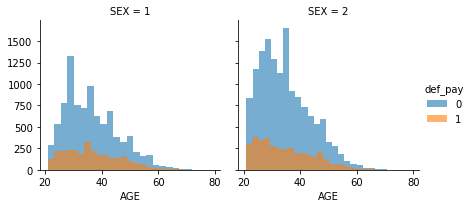

In [43]:
g = sns.FacetGrid(credit, col='SEX', hue='def_pay')
g.map(plt.hist, 'AGE', alpha=0.6, bins=25)
g.add_legend()

In [68]:
correlation = credit.corr()

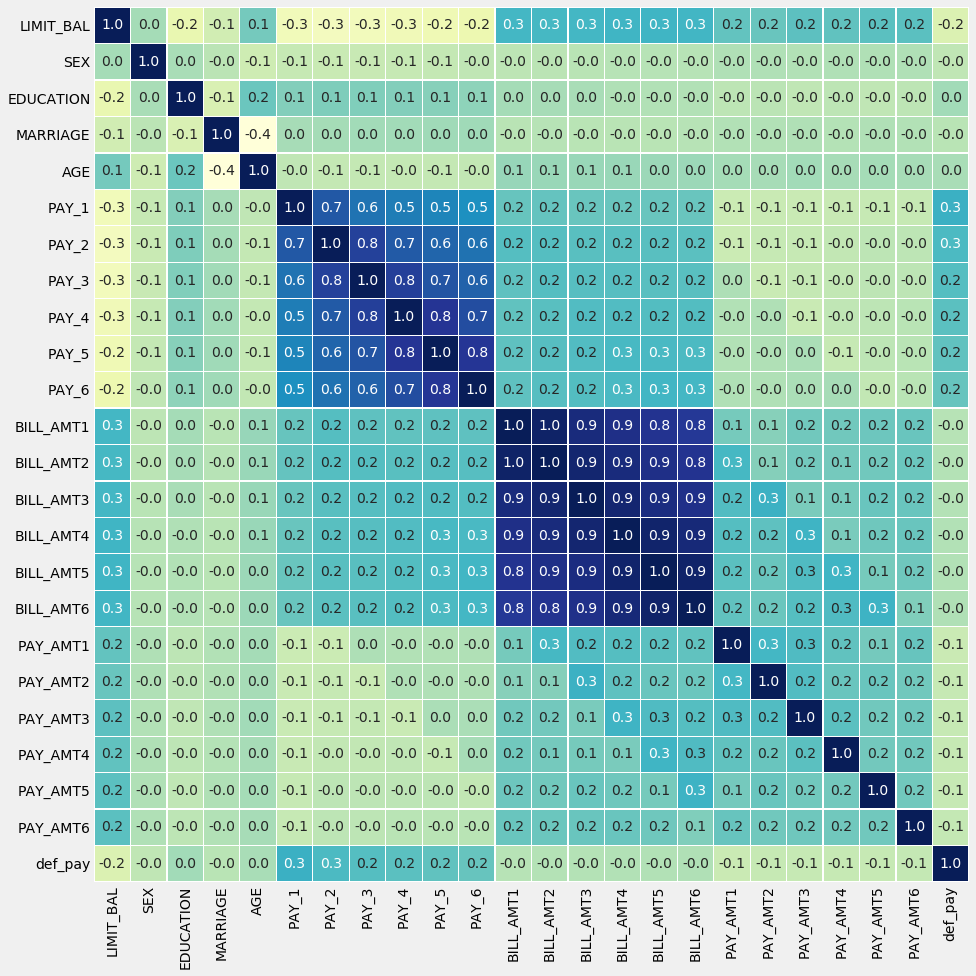

In [93]:
plt.figure(figsize=(15,15))
sns.heatmap(correlation, square=True, annot=True, fmt=".1f", linewidths=.2, cbar=False, cmap="YlGnBu")

In [26]:
#Data Cleaning - Education

education_fill = (credit.EDUCATION == 5) | (credit.EDUCATION == 6) | (credit.EDUCATION == 0)
credit.loc[education_fill, 'EDUCATION'] = 4

#Data Cleaning - Marriage

marriage_fill = (credit.MARRIAGE == 0)
credit.loc[marriage_fill, 'MARRIAGE'] = 3

#Data Cleaning - Pay_X

fil = (credit.PAY_1 == -1) | (credit.PAY_1 == -2)
credit.loc[fil,'PAY_1']=0

fil = (credit.PAY_2 == -1) | (credit.PAY_2 == -2)
credit.loc[fil,'PAY_2']=0

fil = (credit.PAY_3 == -1) | (credit.PAY_3 == -2)
credit.loc[fil,'PAY_3']=0

fil = (credit.PAY_4 == -1) | (credit.PAY_4 == -2)
credit.loc[fil,'PAY_4']=0

fil = (credit.PAY_5 == -1) | (credit.PAY_5 == -2)
credit.loc[fil,'PAY_5']=0

fil = (credit.PAY_6 == -1) | (credit.PAY_6 == -2)
credit.loc[fil,'PAY_6']=0

#Adjusting Data Types
categorical_vars = ['SEX','EDUCATION','MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4',
                   'PAY_5','PAY_6','def_pay']
credit[categorical_vars] = credit[categorical_vars].astype('category')
credit.info()

credit.to_csv('C:/Users/Sumuk/Desktop/Big Data Certificate/Project V - Python/default of credit card clients v2.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null category
EDUCATION    30000 non-null category
MARRIAGE     30000 non-null category
AGE          30000 non-null int64
PAY_1        30000 non-null category
PAY_2        30000 non-null category
PAY_3        30000 non-null category
PAY_4        30000 non-null category
PAY_5        30000 non-null category
PAY_6        30000 non-null category
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
def_pay      30000 non-null category
dtypes: category(10), int64(14)
memory usage: